<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 2: Statistical Treatment for Datasets Starter Notebook\
Last Updated: September 20, 2020\
Author: Raka Ardhi

## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

Please make sure that you have completed the lesson for this course, namely Python and Practical Statistics which is part of this Program.

**Note:** You can take a look at Project Rubric below:

| Code Review |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Mean | Student implement mean to specifics column/data using pandas, numpy, or scipy|
| Median | Student implement median to specifics column/data using pandas, numpy, or scipy|
| Modus | Student implement modus to specifics column/data using pandas, numpy, or scipy|
| Central Tendencies | Implementing Central Tendencies through dataset |
| Box Plot | Implementing Box Plot to visualize spesific data |
| Z-Score | Implementing Z-score concept to specific data |
| Probability Distribution | Student analyzing distribution of data and gain insight from the distribution |
| Intervals | Implementing Confidence or Prediction Intervals |
| Hypotesis Testing | Made 1 Hypotesis and get conclusion from data |
| Preprocessing | Student preprocess dataset before applying the statistical treatment. |
| Does the code run without errors? | The code runs without errors. All code is functional and formatted properly. |

| Readability |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Well Documented | All cell in notebook are well documented with markdown above each cell explaining the code|

| Analysis |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
|Overall Analysis| Gain an insight/conclusion of overall plots that answer the hypotesis |

**Focus on "Graded-Function" sections.**

------------

## Data Preparation

Load the library you need.

Get your NYC property data from [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and load the dataframe to your notebook.

In [1]:
# Get your import statement here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\USER\AppData\Local\Temp\ipykernel_23404\2887342835.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load your dataset here
df = pd.read_csv('nyc-rolling-sales.csv')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
# Write your syntax here
df.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
# Write your syntax here
df.tail(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

To view the dimensions of the dataframe, we use the `.shape` parameter. Expected result: (84548, 22)

In [5]:
# Write your syntax here
df.shape

(84548, 22)

According to this official page, Ease-ment is "is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property". Also, the Unnamed column is not mentioned and was likely used for iterating through records. So, those two columns are removed for now.

In [6]:
# Drop 'Unnamed: 0' and 'EASE-MENT' features using .drop function
col = ['Unnamed: 0', 'EASE-MENT']

df = df.drop(columns=col)
df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Let's view Dtype of each features in dataframe using `.info()` function.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [8]:
#First, let's check which columns should be categorical
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [9]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

Our dataset is ready for checking missing values.

In [10]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing.

We can fill in the missing value from one column to another, which will help us reduce missing values. Expected values:

(6, 20)

(1366, 20)

In [11]:
print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape)
print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


There are 1372 rows that can be filled in with their approximate values.

In [12]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])

In [13]:
#  Check for duplicates before

print(sum(df.duplicated()))

df[df.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


The dataframe has 765 duplicated rows (exluding the original rows).

In [14]:
df.drop_duplicates(inplace=True)

print(sum(df.duplicated()))

0


## Exploratory data analysis

Now, let's get a simple descriptive statistics with `.describe()` function for `COMMERCIAL UNITS` features.

In [15]:
df[df['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04,78777
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05,2017-02-26 22:57:13.702730240
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2016-09-01 00:00:00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05,2016-11-30 00:00:00
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05,2017-02-28 00:00:00
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05,2017-05-27 00:00:00
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08,2017-08-31 00:00:00
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06,NaN


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.

Now, let's get a simple descriptive statistics with `.describe()` function for `RESIDENTIAL UNITS` features.

Function below are graded function. (1 Points)

In [16]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
print('This is Statistics Descriptive for RESIDENTIAL UNITS')
df['RESIDENTIAL UNITS'].describe()

# Graded-Funtion End

This is Statistics Descriptive for RESIDENTIAL UNITS


count    83783.000000
mean         1.999976
std         16.569118
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max       1844.000000
Name: RESIDENTIAL UNITS, dtype: float64

Write your findings below:

Berdasarkan hasil dari statistik deskriptif untuk kolom RESIDENTIAL UNITS, total value yang terdapat pada kolom tersebut sebanyak 83783 data. Nilai rata - rata untuk data pada RESIDENTIAL UNITS sebesar 1.999976, nilai standar deviasi sebesar 16.569118, nilai minimum sebesar 0, sedangkan nilai maksimumnya sebesar 1844, kemudian untuk nilai kuartil pertama sebesar 0, nilai kuartil kedua atau median sebesar 1, dan untuk nilai kuartil ketiga sebesar 2.

Use `.value_counts` function to count total value of `BOROUGH` features. Expected value:

4    26548\
3    23843\
1    18102\
5     8296\
2     6994\
Name: BOROUGH, dtype: int64

In [17]:
# Write your syntax below
df['BOROUGH'].value_counts()

BOROUGH
4    26548
3    23843
1    18102
5     8296
2     6994
Name: count, dtype: int64

From here, we can calculate the mean for each Borough. Use `.mean()` function to calculate mean.

Function below are graded function. (1 Points)

In [18]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
mean_by_borough = df.groupby('BOROUGH')['LAND SQUARE FEET'].mean()
mean_by_borough

# Graded-Funtion End

BOROUGH
1    5646.945628
2    3909.012725
3    2016.057333
4    4265.245190
5    8339.843259
Name: LAND SQUARE FEET, dtype: float64

From here, we can calculate the median for each Borough. Use `.median()` function to calculate median.

Function below are graded function. (1 Points)

In [19]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
med_by_borough = df.groupby('BOROUGH')['LAND SQUARE FEET'].median()
med_by_borough

# Graded-Funtion End

BOROUGH
1    2498.0
2    2375.0
3    1800.0
4    2768.0
5    3700.0
Name: LAND SQUARE FEET, dtype: float64

From here, we can calculate the mode for each Borough.

Function below are graded function. (1 Points)

In [20]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
mod_by_borough = df.groupby('BOROUGH')['LAND SQUARE FEET'].agg(lambda x: x.mode().iloc[0])
mod_by_borough

# Graded-Funtion End

BOROUGH
1    2523.0
2       0.0
3       0.0
4    4000.0
5    4000.0
Name: LAND SQUARE FEET, dtype: float64

From here, we can calculate the Range for each Borough.

Function below are graded function. (1 Points)

In [21]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
range_by_borough = df.groupby('BOROUGH')['LAND SQUARE FEET'].agg(lambda x: x.max() - x.min())
range_by_borough

# Graded-Funtion End

BOROUGH
1     363912.0
2     679000.0
3     970000.0
4    4228293.0
5    4252225.0
Name: LAND SQUARE FEET, dtype: float64

From here, we can calculate the Variance for each Borough.

Function below are graded function. (1 Points)

In [22]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
variance_by_borough = df.groupby('BOROUGH')['LAND SQUARE FEET'].var()
variance_by_borough

# Graded-Funtion End

BOROUGH
1    2.727154e+08
2    3.375209e+08
3    7.882877e+07
4    2.092701e+09
5    7.797466e+09
Name: LAND SQUARE FEET, dtype: float64

From here, we can calculate the SD for each Borough.

Function below are graded function. (1 Points)

In [23]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
std_by_borough = df.groupby('BOROUGH')['LAND SQUARE FEET'].std()
std_by_borough

# Graded-Funtion End

BOROUGH
1    16514.096636
2    18371.742462
3     8878.556905
4    45746.045898
5    88303.260793
Name: LAND SQUARE FEET, dtype: float64

### Look for Central Tendencies for LAND SQUARE FEET by BOROUGH

In [24]:
central_tendencies_by_borough = df.groupby('BOROUGH')['LAND SQUARE FEET'].agg(['mean', 'median', lambda x: x.mode().iloc[0]])
central_tendencies_by_borough.columns = ['mean', 'median', 'mode']

In [25]:
central_tendencies_by_borough

,mean,median,mode
BOROUGH,,,
1,5646.945628,2498.0,2523.0
2,3909.012725,2375.0,0.0
3,2016.057333,1800.0,0.0
4,4265.245190,2768.0,4000.0
5,8339.843259,3700.0,4000.0


Analisis luas tanah (LAND SQUARE FEET) berdasarkan kota (BOROUGH) menunjukkan bahwa kota 1 memiliki distribusi yang condong ke kanan, dengan rata-rata 5646,95 kaki persegi, jauh lebih tinggi dari median 2498,0. Modusnya mendekati median pada 2523,0, menunjukkan distribusi yang berkelompok di sekitar nilai-nilai tersebut. Kota 2 dan Kota 3 menunjukkan pola yang sama dengan rata-rata masing-masing 3909,01 dan 2016,06 kaki persegi, tetapi modus yang tidak biasa sebesar 0,0, menunjukkan jumlah nilai yang hilang atau nol yang signifikan dalam data. Sebaliknya, Kota 4 dan Kota 5 memiliki distribusi yang lebih merata, dengan ukuran tanah rata-rata masing-masing 4265,25 dan 8339,84 kaki persegi, dan modus 4000,0, menandakan adanya standar atau regulasi umum yang memengaruhi ukuran lahan di daerah-daerah ini.

In [34]:
df.head(5)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,LAND SQUARE FEET_normalized
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,-0.050580
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,...,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14,0.035894
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,...,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09,-0.033795
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,-0.032056
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,-0.029244


In [26]:
# Check again missing value in column
for value in df['LAND SQUARE FEET']:
    print(value)

1633.0
4616.0
2212.0
2272.0
2369.0
2581.0
1750.0
5163.0
1534.0
4489.0
4295.0
3717.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
4131.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
36472.0
nan
33650.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1520.0
2201.0
1779.0
1779.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
1218.0
32246.0
3408.0
nan
nan
nan
nan
nan
nan
1360.0
1360.0
1975.0
1588.0
1526.0
2000.0
2150.0
2227.0
2469.0
nan
1463.0
1026.0
2057.0
2307.0
2057.0
2581.0
1566.0

In [27]:
median_lsfeet = df['LAND SQUARE FEET'].median()

# Fill missing values with the median
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].fillna(median_lsfeet)

### Look for Boxplot for LAND SQUARE FEET by BOROUGH

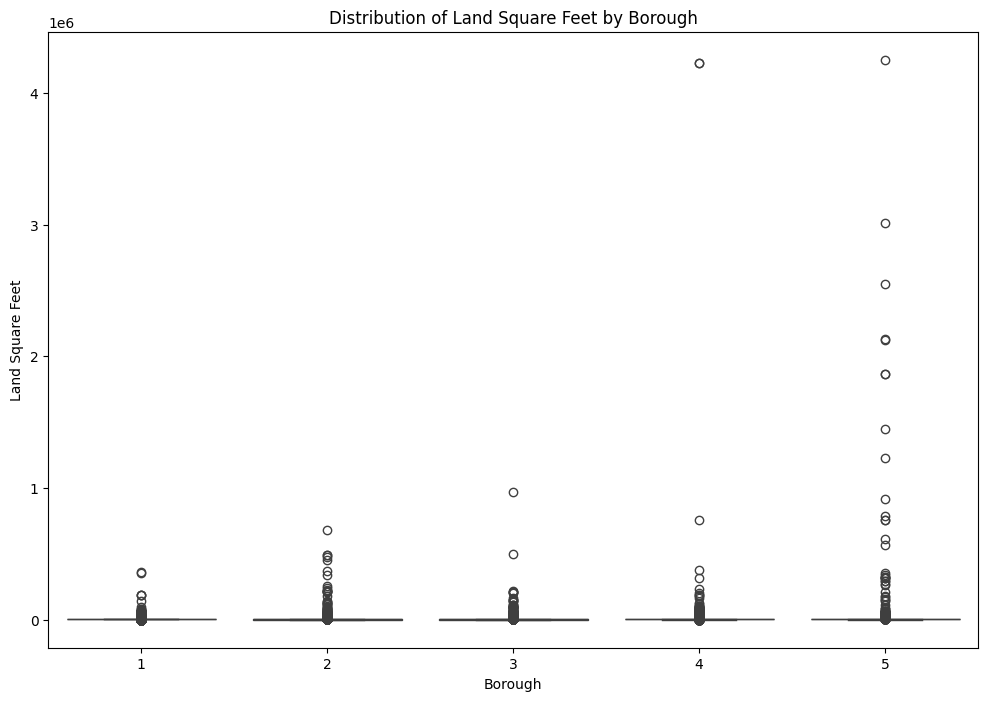

In [30]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='BOROUGH', y='LAND SQUARE FEET', data=df)
plt.title('Distribution of Land Square Feet by Borough')
plt.xlabel('Borough')
plt.ylabel('Land Square Feet')
plt.show()

Berdasarkan analisis di atas dapat dikatakan bahwa di setiap kota (BOROUGH) terdapat ketimpangan luas tanah (LAND SQUARE FEET) yang signifikan. Hal ini ditandakan dengan terdapatnya nilai outlier untuk luas tanah di setiap kotanya.

#### Perform Z-score to Normalize Data

Berdasarkan hasil boxplot di atas, diketahui bahwa feature luas tanah (LAND SQUARE FEET) memiliki ketimpangan yang signifikan. Sehingga data perlu dilakukan Normalisasi sebagai salah satu metode untuk mengatasi ketimpangan tersebut

z= (x−mean(x))/std(x)
 


In [31]:
mean_lsfeet = df['LAND SQUARE FEET'].mean()
std_lsfeet = df['LAND SQUARE FEET'].std()

# Perform z-score normalization
df['LAND SQUARE FEET_normalized'] = (df['LAND SQUARE FEET'] - mean_lsfeet) / std_lsfeet

### Probability Distribution

Now we can analyze Probability Distibution below.

Function below are graded function. (1 Points)

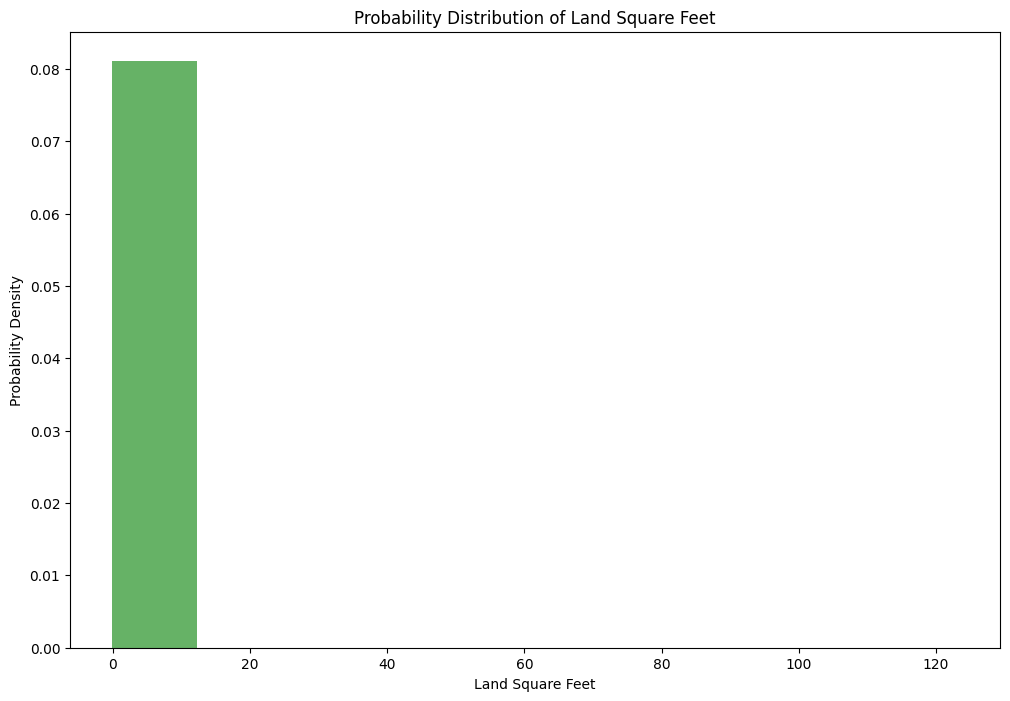

In [47]:
# Write your function below

# Graded-Funtion Begin
plt.figure(figsize=(12, 8))
plt.hist(df['LAND SQUARE FEET_normalized'], bins=10, density=True, alpha=0.6, color='g')
plt.xlabel('Land Square Feet')
plt.ylabel('Probability Density')
plt.title('Probability Distribution of Land Square Feet')
plt.show()


# Graded-Funtion End

Now we can analyze Confidence Intervals below.

Function below are graded function. (1 Points)

In [ ]:
# Write your function below

# Graded-Funtion Begin
pop_mean = df['LAND SQUARE FEET_normalized'].mean()
pop_std = df['LAND SQUARE FEET_normalized'].std()

sample_means = []
n = 20000
for sample in range(0, 83783):
    #random sampling done with replacement
    sample_values = np.random.choice(a=df['LAND SQUARE FEET_normalized'], size=n)
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)


# Graded-Funtion End

C:\Users\USER\AppData\Local\Temp\ipykernel_23404\1738421388.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_means)


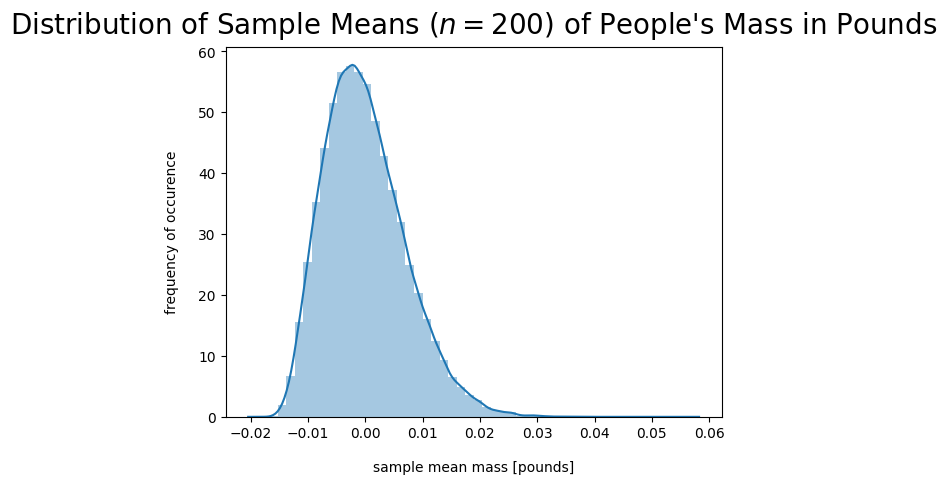

In [51]:
# View Distribution of Sample Means (Otherwise Called Sampling Distribution)
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=200$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

In [54]:
import scipy.stats as stats

# Calculate Median of Sample Means
median_of_sample_means = np.median(sample_means)

# Calculate Mean of Sample Means
mean_of_sample_means = np.mean(sample_means)

# Calculate Standard Deviation of Sample Means
std_dev_of_sample_means = np.std(sample_means)

standard_error = pop_std/np.sqrt(n)

#critical Z-score
tail = 1 - stats.norm.cdf(1.96)
lower_95_perc_bound = mean_of_sample_means - 1.96*standard_error
upper_95_perc_bound = mean_of_sample_means + 1.96*standard_error

print(lower_95_perc_bound, upper_95_perc_bound)

-0.013893798667762107 0.013824787154750556


In [59]:
print(mean_of_sample_means)

-3.4505756505775134e-05


Confidence interval for the mean Land Square Feet Normalized : (-0.013893798667762107, 0.013824787154750556)

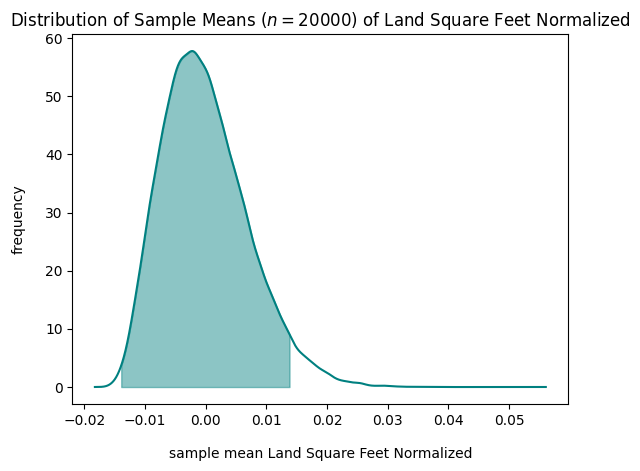

In [55]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_95_perc_bound, upper_95_perc_bound, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal',)

plt.title("Distribution of Sample Means ($n=20000$) of Land Square Feet Normalized")
plt.xlabel("sample mean Land Square Feet Normalized", labelpad=14)
plt.ylabel("frequency", labelpad=14);

Make your Hypothesis Testing below

Function below are graded function. (1 Points)

In [60]:
# Write your function below

# Graded-Funtion Begin
# Define null hypothesis: mean number of residential units = 2
null_hypothesis_mean = -4e-05

t_statistic, p_value = stats.ttest_1samp(df['LAND SQUARE FEET_normalized'], null_hypothesis_mean)
alpha = 0.05

print("Hypothesis Test Results:")
print("Null Hypothesis: Mean number of land square feet normalized =", null_hypothesis_mean)
print("Alternative Hypothesis: Mean number of land square feet normalized !=", null_hypothesis_mean)  # Using "!=" symbol
print("Test Statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Result: Reject the null hypothesis.")
else:
    print("Result: Fail to reject the null hypothesis.")

# Graded-Funtion End

Hypothesis Test Results:
Null Hypothesis: Mean number of land square feet normalized = -4e-05
Alternative Hypothesis: Mean number of land square feet normalized != -4e-05
Test Statistic: 0.011578117290820646
P-value: 0.9907622329303863
Result: Fail to reject the null hypothesis.


Write your final conclusion below.

Your conclusion below are graded. (1 Points)


Berdasarkan uji hipotesis, kami menemukan:

* Hipotesis nol: Rata-rata luas tanah (Land Square Feet Normalized) adalah -4e-05.
* Hipotesis alternatif: Rata-rata luas tanah (Land Square Feet Normalized) bukan -4e-05.
* Hasil: Gagal menolak hipotesis nol.
* Kesimpulan: Berdasarkan hasil uji hipotesis, kita menolak hipotesis nol, yang menyatakan bahwa rata-rata luas tanah yang dinormalisasi sama dengan -4e-05. Statistik uji adalah 0.0116, dan nilai p-nya adalah 0.9908. Hal ini menunjukkan bahwa tidak ada cukup bukti untuk menyarankan bahwa rata-rata luas tanah yang dinormalisasi berbeda dari -4e-05. Oleh karena itu, berdasarkan analisis ini, kita menyimpulkan bahwa tidak ada perbedaan yang signifikan dalam rata-rata luas tanah yang dinormalisasi dibandingkan dengan nilai hipotesis nol.